In [1]:
%pip install matplotlib
%pip install numpy

%pip install tensorflow
%pip install scikit-learn
%pip install scikit-image
%pip PIL

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "PIL"



In [2]:
import os
import random

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from skimage.metrics import structural_similarity

In [3]:
folder_data_initial_name="pets"

image_size = (128, 128)
batch_size = 32

images=[]
for image in os.scandir(folder_data_initial_name):
	if not image.name.endswith(".jpg"):
		continue
	image_read = tf.image.resize(tf.image.decode_jpeg(tf.io.read_file(image.path), channels=3), image_size)
	images.append(image_read.numpy())

images = np.array(images).astype('float32') / 255.0
print("Images read", len(images))
	

Images read 7390


In [4]:
encoder_input = keras.layers.Input(shape=(image_size[0], image_size[1], 3), name='encoder_input')
encoder = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
encoder = keras.layers.MaxPooling2D((2, 2), padding='same')(encoder)
encoder = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoder)
encoder = keras.layers.MaxPooling2D((2, 2), padding='same')(encoder)
encoder = keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoder)
encoder = keras.layers.MaxPooling2D((2, 2), padding='same')(encoder)

In [5]:
decoder = keras.layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(encoder)
decoder = keras.layers.UpSampling2D((2, 2))(decoder)
decoder = keras.layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(decoder)
decoder = keras.layers.UpSampling2D((2, 2))(decoder)
decoder = keras.layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(decoder)
decoder = keras.layers.UpSampling2D((2, 2))(decoder)
decoder_output = keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoder)

In [6]:
autoencoder = keras.models.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 16, 16, 128)    │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 32, 32, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 64, 64, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,955 (1.27 MB)

 Trainable params: 333,955 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
autoencoder.fit(images, images, epochs=1, batch_size=batch_size, validation_split=0.2)

185/185 ━━━━━━━━━━━━━━━━━━━━ 55s 299ms/step - loss: 0.0088 - val_loss: 0.0080


In [22]:
def generate(autoencoder, images, noise_factor=0.0):
	images_count=len(images)
	mse=None
	ssim_total = 0
	
	if(noise_factor>0):
		images_contructed = autoencoder.predict(images + np.random.normal(loc=0, scale=noise_factor, size=(images_count, image_size[0], image_size[1], 3)))
	else:
		images_contructed = autoencoder.predict(np.array(images))
	mse = np.mean(np.square(images_contructed - images))

	for i in range(len(images)):
		ssim_total += structural_similarity(images[i], images_contructed[i], multichannel=True, win_size=3, data_range=1)
	ssim = ssim_total / len(images)
	
	return images_contructed, mse, ssim

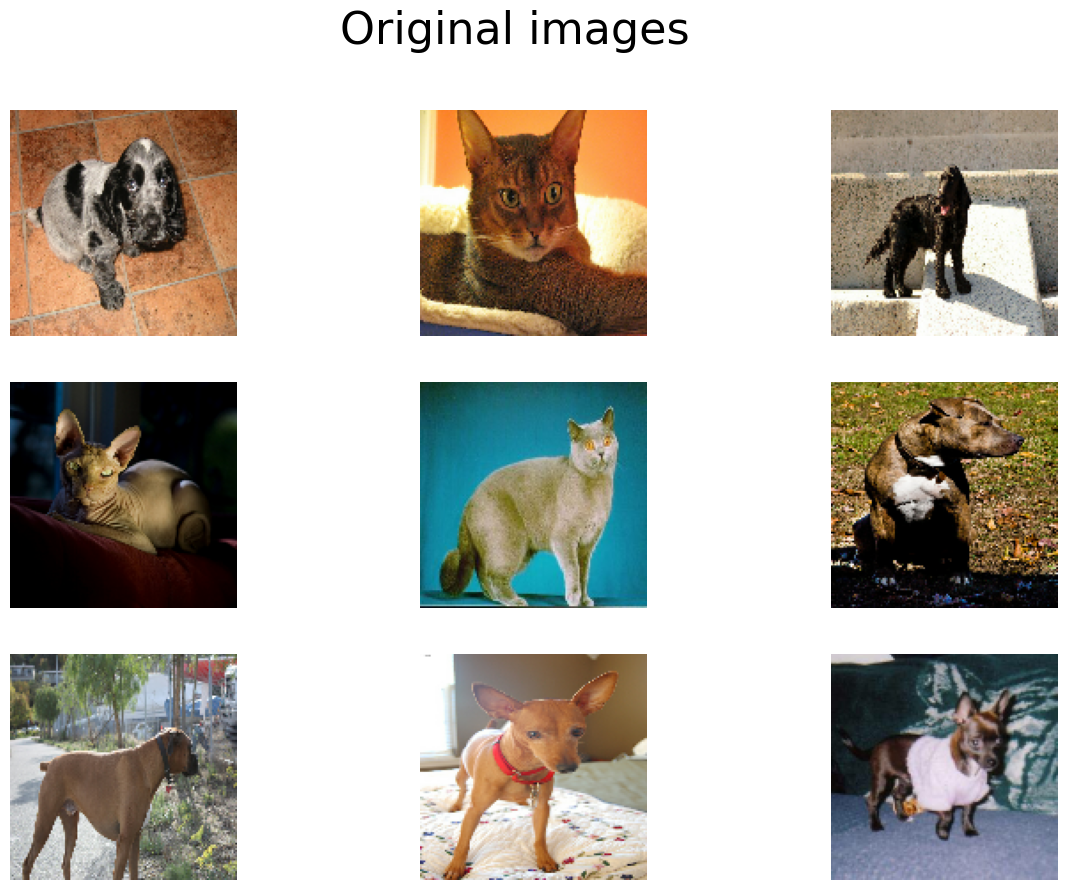

In [23]:
images_test=random.sample(list(images), 9)
images_test_count=len(images_test)

fig=plt.figure(figsize=(15, 10))
fig.suptitle('Original images', fontsize=32)
for i in range(images_test_count):
	plt.subplot(3, 3, i + 1)
	plt.imshow(images_test[i])
	plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
MSE:  0.009147488
SSIM:  0.6818566617162141


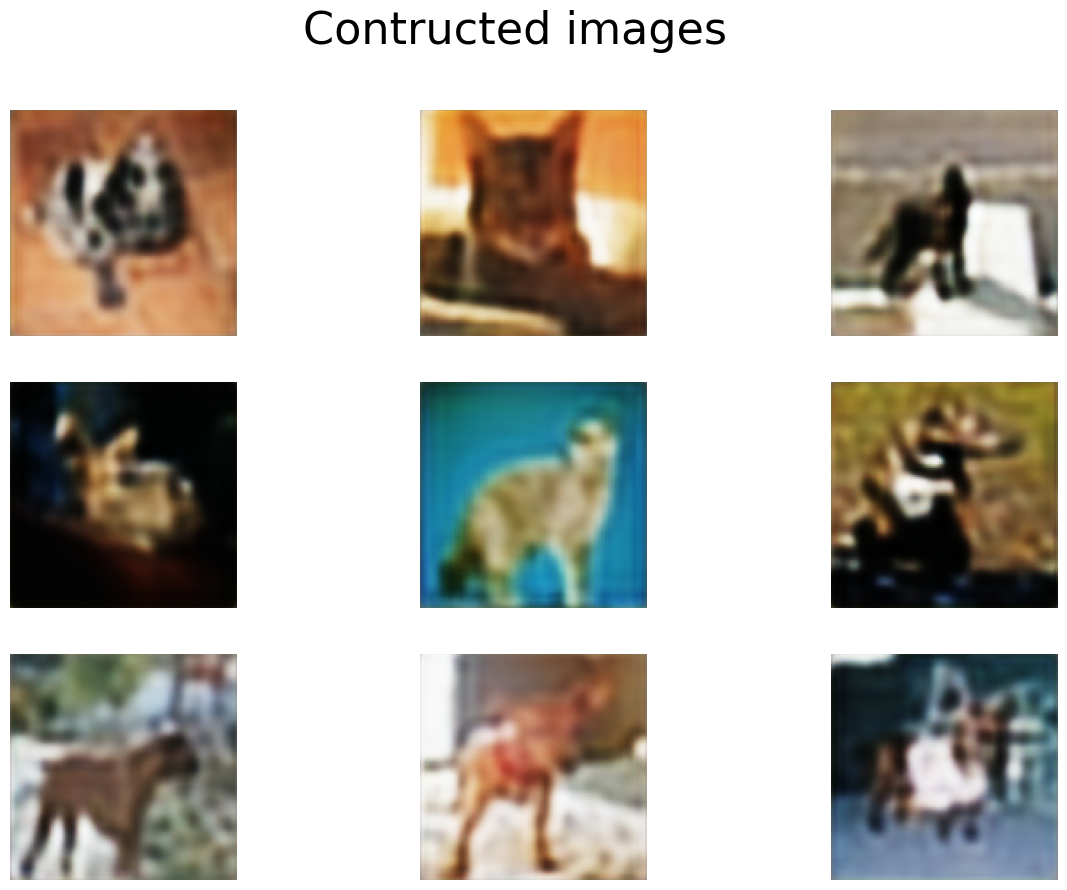

In [24]:
images_contructed, mse, ssim = generate(autoencoder, images_test)
print("MSE: ", mse)
print("SSIM: ", ssim)

fig=plt.figure(figsize=(15, 10))
fig.suptitle('Contructed images', fontsize=32)
for i in range(images_test_count):
	plt.subplot(3, 3, i + 1)
	plt.imshow(images_contructed[i])
	plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
MSE:  0.012783224
SSIM:  0.6522894519088474


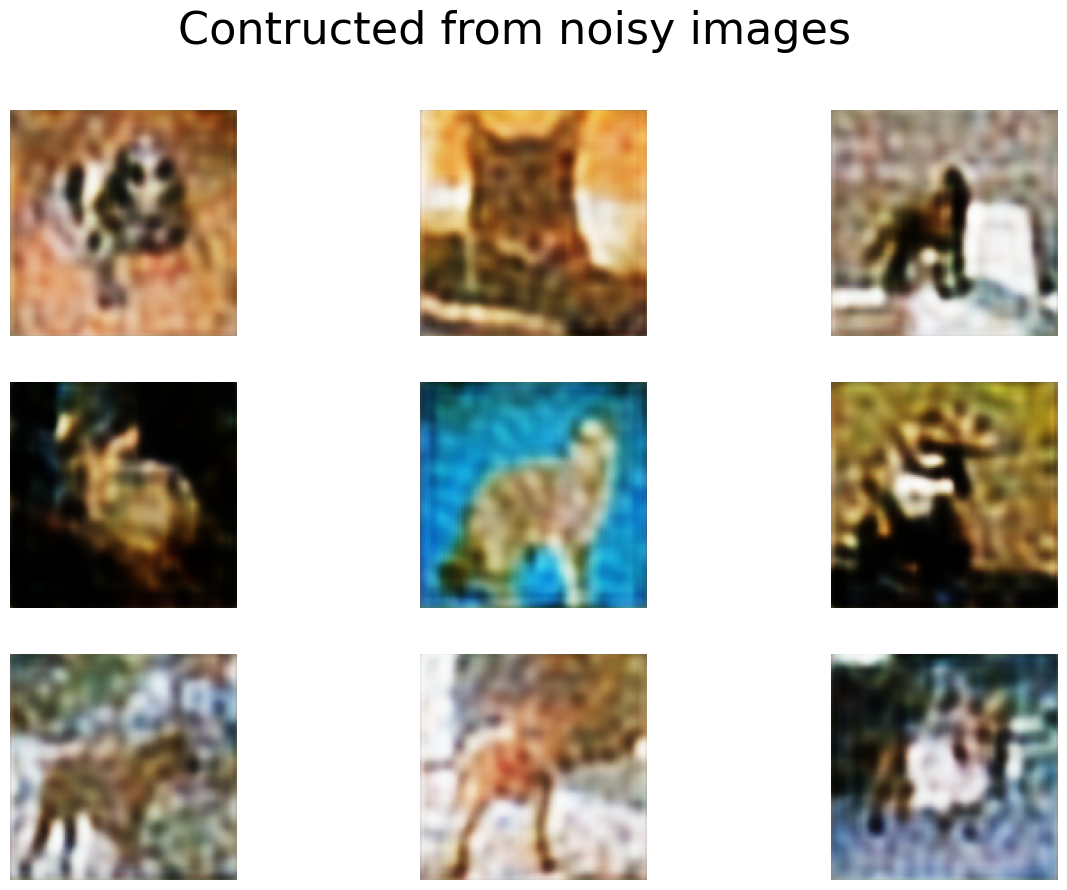

In [26]:
images_contructed, mse, ssim = generate(autoencoder, images_test, 0.3)
print("MSE: ", mse)
print("SSIM: ", ssim)

fig=plt.figure(figsize=(15, 10))
fig.suptitle('Contructed from noisy images', fontsize=32)
for i in range(images_test_count):
	plt.subplot(3, 3, i + 1)
	plt.imshow(images_contructed[i])
	plt.axis("off")
plt.show()